In [ ]:
import pyarrow.parquet as pq
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import stats

In [11]:
trips = pq.read_table('yellow_tripdata_2023-10.parquet')
trips = trips.to_pandas()

In [12]:
trips.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-10-01 00:16:44,2023-10-01 00:16:49,1.0,0.00,1.0,N,168,168,2,3.0,1.0,0.5,0.00,0.00,1.0,5.50,0.0,0.00
1,1,2023-10-01 00:23:24,2023-10-01 00:23:47,1.0,0.00,1.0,N,168,168,2,3.0,1.0,0.5,0.00,0.00,1.0,5.50,0.0,0.00
2,1,2023-10-01 00:21:18,2023-10-01 00:27:31,1.0,0.90,1.0,N,161,186,1,6.5,3.5,0.5,2.90,0.00,1.0,14.40,2.5,0.00
3,1,2023-10-01 00:17:39,2023-10-01 00:17:47,0.0,0.00,1.0,N,255,255,3,3.0,1.0,0.5,0.00,0.00,1.0,5.50,0.0,0.00
4,2,2023-10-01 00:16:15,2023-10-01 00:22:57,2.0,1.41,1.0,N,151,239,1,10.0,1.0,0.5,3.00,0.00,1.0,18.00,2.5,0.00
5,2,2023-10-01 00:33:14,2023-10-01 00:52:12,1.0,3.15,1.0,N,238,246,1,19.8,1.0,0.5,4.46,0.00,1.0,29.26,2.5,0.00
6,2,2023-10-01 00:58:18,2023-10-01 01:01:20,2.0,0.67,1.0,N,50,50,1,5.8,1.0,0.5,2.16,0.00,1.0,12.96,2.5,0.00
7,2,2023-10-01 00:11:29,2023-10-01 00:32:55,2.0,14.93,1.0,N,208,239,1,37.3,1.0,0.5,14.77,6.94,1.0,65.76,2.5,1.75
8,1,2023-10-01 00:22:33,2023-10-01 00:34:00,0.0,3.20,1.0,N,87,249,1,16.3,3.5,0.5,4.25,0.00,1.0,25.55,2.5,0.00
9,1,2023-10-01 00:39:47,2023-10-01 00:48:48,1.0,1.30,1.0,N,125,231,1,10.0,3.5,0.5,2.00,0.00,1.0,17.00,2.5,0.00


In [13]:
trips.tail(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
3522275,2,2023-10-31 23:54:34,2023-11-01 00:22:07,NaN,4.76,NaN,None,249,256,0,25.88,0.0,0.5,5.98,0.0,1.0,35.86,NaN,NaN
3522276,1,2023-10-31 23:00:46,2023-10-31 23:20:40,NaN,0.00,NaN,None,90,151,0,22.43,0.0,0.5,0.00,0.0,1.0,26.43,NaN,NaN
3522277,1,2023-10-31 23:53:12,2023-11-01 00:26:54,NaN,0.00,NaN,None,249,127,0,39.35,0.0,0.5,0.00,0.0,1.0,43.35,NaN,NaN
3522278,1,2023-10-31 23:34:28,2023-10-31 23:45:31,NaN,0.00,NaN,None,90,161,0,17.38,0.0,0.5,0.00,0.0,1.0,21.38,NaN,NaN
3522279,2,2023-10-31 23:51:00,2023-11-01 00:06:00,NaN,2.06,NaN,None,90,137,0,13.44,0.0,0.5,0.00,0.0,1.0,17.44,NaN,NaN
3522280,1,2023-10-31 23:44:53,2023-11-01 00:08:00,NaN,0.00,NaN,None,230,243,0,35.79,0.0,0.5,0.00,0.0,1.0,39.79,NaN,NaN
3522281,2,2023-10-31 23:38:00,2023-10-31 23:51:00,NaN,3.10,NaN,None,233,236,0,14.51,0.0,0.5,3.70,0.0,1.0,22.21,NaN,NaN
3522282,2,2023-10-31 23:56:58,2023-11-01 00:15:03,NaN,2.71,NaN,None,68,211,0,15.60,0.0,0.5,3.33,0.0,1.0,22.93,NaN,NaN
3522283,1,2023-10-31 23:37:55,2023-10-31 23:50:16,NaN,0.00,NaN,None,114,144,0,11.50,0.0,0.5,0.00,0.0,1.0,15.50,NaN,NaN
3522284,1,2023-10-31 23:30:15,2023-10-31 23:49:46,NaN,0.00,NaN,None,163,79,0,20.59,0.0,0.5,0.00,0.0,1.0,24.59,NaN,NaN


In [14]:
trips.trip_distance.mean()

3.926694986351193

In [15]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522285 entries, 0 to 3522284
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [16]:
trips.drop_duplicates()
print('Rows:',trips.shape[0])

Rows: 3522285


In [17]:
trips.columns[trips.isna().any(axis = 0)]

Index(['passenger_count', 'RatecodeID', 'store_and_fwd_flag',
       'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [18]:
trips['Airport_fee'].fillna(0, inplace=True)
trips['congestion_surcharge'].fillna(0, inplace=True)

In [19]:
to_drop = trips[trips['trip_distance'] > 150].index
trips.drop(to_drop, inplace = True)


In [20]:
print('Rows:',trips.shape[0])

Rows: 3522214


In [21]:
#duration in minutes
trips['duration_mins'] = ( (trips['tpep_dropoff_datetime'] - trips['tpep_pickup_datetime']).dt.total_seconds() / 60 ).round(2)

In [22]:
to_drop = trips[trips['duration_mins'] > 300].index
trips.drop(to_drop, inplace = True)
print('Rows:',trips.shape[0])

Rows: 3519662


In [23]:
#This flag indicates whether the trip record was held in vehicle memory which is not relavant to calculating the fare
trips.drop(columns=['store_and_fwd_flag'], inplace=True)

In [24]:
trips['pickup_day'] = trips['tpep_pickup_datetime'].dt.dayofweek
trips['pickup_hr'] = trips['tpep_pickup_datetime'].dt.hour

In [25]:
# dates already in pandas date format
# trips['pickup_t'] = pd.to_datetime(trips['tpep_pickup_datetime'])

In [26]:
trips

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration_mins,pickup_day,pickup_hr
0,1,2023-10-01 00:16:44,2023-10-01 00:16:49,1.0,0.00,1.0,168,168,2,3.00,...,0.5,0.00,0.0,1.0,5.50,0.0,0.0,0.08,6,0
1,1,2023-10-01 00:23:24,2023-10-01 00:23:47,1.0,0.00,1.0,168,168,2,3.00,...,0.5,0.00,0.0,1.0,5.50,0.0,0.0,0.38,6,0
2,1,2023-10-01 00:21:18,2023-10-01 00:27:31,1.0,0.90,1.0,161,186,1,6.50,...,0.5,2.90,0.0,1.0,14.40,2.5,0.0,6.22,6,0
3,1,2023-10-01 00:17:39,2023-10-01 00:17:47,0.0,0.00,1.0,255,255,3,3.00,...,0.5,0.00,0.0,1.0,5.50,0.0,0.0,0.13,6,0
4,2,2023-10-01 00:16:15,2023-10-01 00:22:57,2.0,1.41,1.0,151,239,1,10.00,...,0.5,3.00,0.0,1.0,18.00,2.5,0.0,6.70,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3522280,1,2023-10-31 23:44:53,2023-11-01 00:08:00,NaN,0.00,NaN,230,243,0,35.79,...,0.5,0.00,0.0,1.0,39.79,0.0,0.0,23.12,1,23
3522281,2,2023-10-31 23:38:00,2023-10-31 23:51:00,NaN,3.10,NaN,233,236,0,14.51,...,0.5,3.70,0.0,1.0,22.21,0.0,0.0,13.00,1,23
3522282,2,2023-10-31 23:56:58,2023-11-01 00:15:03,NaN,2.71,NaN,68,211,0,15.60,...,0.5,3.33,0.0,1.0,22.93,0.0,0.0,18.08,1,23
3522283,1,2023-10-31 23:37:55,2023-10-31 23:50:16,NaN,0.00,NaN,114,144,0,11.50,...,0.5,0.00,0.0,1.0,15.50,0.0,0.0,12.35,1,23


Relevant numerical features that are continuous are normalised for faster model convergence and to reduce sensitivity to scales

In [27]:
numeric_cols = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount','tolls_amount', 'total_amount','congestion_surcharge', 'duration_mins']

In [30]:
from scipy.stats import zscore

In [32]:
z_scores = trips[numeric_cols].apply(zscore)
z_scores

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,duration_mins
0,-0.746223,-0.881823,-0.281019,0.132791,-0.864109,-0.274072,-0.975097,-2.383171,-0.000615
1,-0.746223,-0.881823,-0.281019,0.132791,-0.864109,-0.274072,-0.975097,-2.383171,-0.000595
2,-0.549544,-0.700868,1.074142,0.132791,-0.174442,-0.274072,-0.608398,0.365073,-0.000207
3,-0.746223,-0.881823,-0.281019,0.132791,-0.864109,-0.274072,-0.975097,-2.383171,-0.000611
4,-0.438093,-0.519912,-0.281019,0.132791,-0.150660,-0.274072,-0.460071,0.365073,-0.000175
...,...,...,...,...,...,...,...,...,...
3522280,-0.746223,0.813469,-0.823083,0.132791,-0.864109,-0.274072,0.437723,-2.383171,0.000915
3522281,-0.068774,-0.286739,-0.823083,0.132791,0.015811,-0.274072,-0.286610,-2.383171,0.000243
3522282,-0.154001,-0.230384,-0.823083,0.132791,-0.072181,-0.274072,-0.256944,-2.383171,0.000581
3522283,-0.746223,-0.442360,-0.823083,0.132791,-0.864109,-0.274072,-0.563076,-2.383171,0.000200


In [33]:
mean = z_scores.mean()
std_dev = z_scores.std()
threshold = mean + 3 * std_dev

In [34]:
outliers = (z_scores > threshold)
trips = trips[~outliers.any(axis=1)]

In [35]:
trips.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration_mins,pickup_day,pickup_hr
count,3.292713e+06,3.141850e+06,3.292713e+06,3.141850e+06,3.292713e+06,3.292713e+06,3.292713e+06,3.292713e+06,3.292713e+06,3.292713e+06,3.292713e+06,3.292713e+06,3.292713e+06,3.292713e+06,3.292713e+06,3.292713e+06,3.292713e+06,3.292713e+06,3.292713e+06
mean,1.745039e+00,1.350655e+00,2.555420e+00,1.656517e+00,1.669790e+02,1.655158e+02,1.164138e+00,1.680191e+01,1.402209e+00,4.875817e-01,3.064460e+00,2.633710e-01,9.780234e-01,2.485151e+01,2.197901e+00,7.763439e-02,6.843162e+00,3.004344e+00,1.421101e+01
std,4.386939e-01,8.727437e-01,2.792979e+00,7.846881e+00,6.495993e+01,6.924870e+01,5.701958e-01,1.258359e+01,1.591890e+00,1.061133e-01,2.849970e+00,1.339881e+00,2.069848e-01,1.576423e+01,8.803633e-01,3.698063e-01,1.556739e+04,2.003933e+00,5.883324e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-8.880000e+01,-4.000000e+01,-1.000000e+00,-9.010000e+02,-2.500000e+00,-1.750000e+00,-2.824830e+07,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,9.900000e-01,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00,7.850000e+00,1.000000e+00,1.000000e+01
50%,2.000000e+00,1.000000e+00,1.640000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.800000e+00,0.000000e+00,1.000000e+00,2.093000e+01,2.500000e+00,0.000000e+00,1.280000e+01,3.000000e+00,1.500000e+01
75%,2.000000e+00,1.000000e+00,2.880000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.220000e+00,0.000000e+00,1.000000e+00,2.900000e+01,2.500000e+00,0.000000e+00,2.015000e+01,5.000000e+00,1.900000e+01
max,6.000000e+00,8.000000e+00,1.714000e+01,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,7.800000e+01,7.000000e+00,8.000000e-01,1.624000e+01,7.440000e+00,1.000000e+00,1.019400e+02,2.500000e+00,1.750000e+00,2.983300e+02,6.000000e+00,2.300000e+01


In [36]:
# Day 5, 6 represents weekend  
avg_distance = trips.groupby(trips['pickup_day'].isin([5,6]))['trip_distance'].mean()

In [37]:
print("Average normalised trip distance on weekdays:", avg_distance[False].round(4), "\nAverage normalised trip distance on weekends: ", avg_distance[True].round(4))

Average normalised trip distance on weekdays: 2.5245 
Average normalised trip distance on weekends:  2.6316


Calculations show average trip distance is greater on weekends than on weekdays.

In [38]:
corr_mat = trips[['trip_distance', 'fare_amount', 'duration_mins']].corr()

In [39]:
print(corr_mat)

               trip_distance  fare_amount  duration_mins
trip_distance       1.000000     0.812511       0.000622
fare_amount         0.812511     1.000000       0.000477
duration_mins       0.000622     0.000477       1.000000


There is greater correlation between trip distance and fare amount, which intuitively makes sense
On the other hand a larger duration doesnt necessarily translate to a larger trip distance, this is further proven by the low correalation value. 

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
pivot_table = trips.pivot_table(index='pickup_day', columns='pickup_hr', aggfunc='size')

In [42]:
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

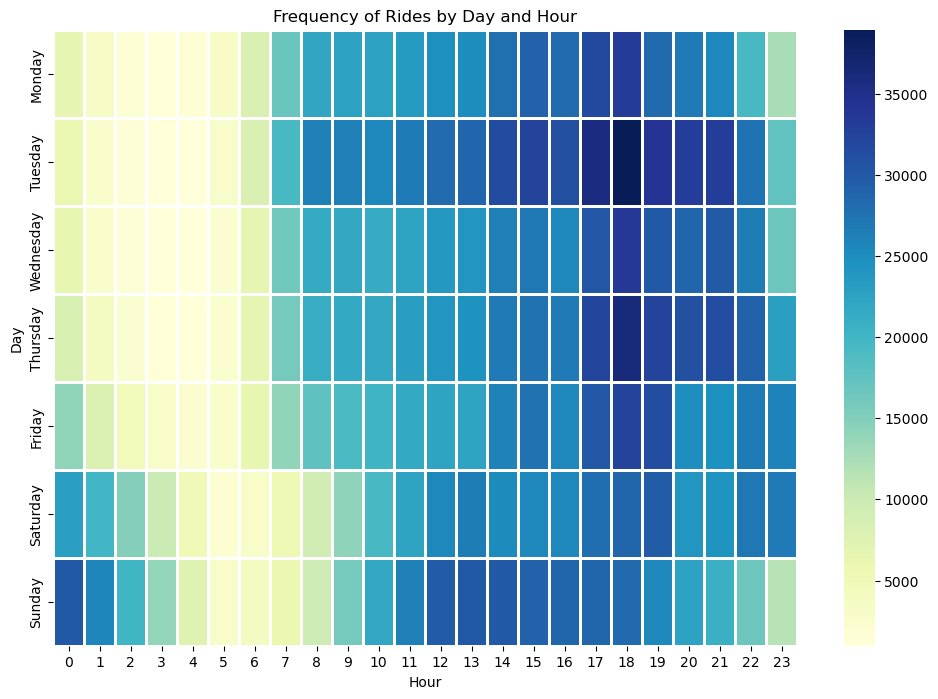

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', linecolor='white', linewidth=1)
plt.yticks(ticks=[x + 0.5 for x in range(7)], labels=day_names)
plt.title('Frequency of Rides by Day and Hour')
plt.xlabel('Hour')
plt.ylabel('Day')
plt.show()

The heatmap shows rides are more frequent during weekdays specially between hours 17 and 19

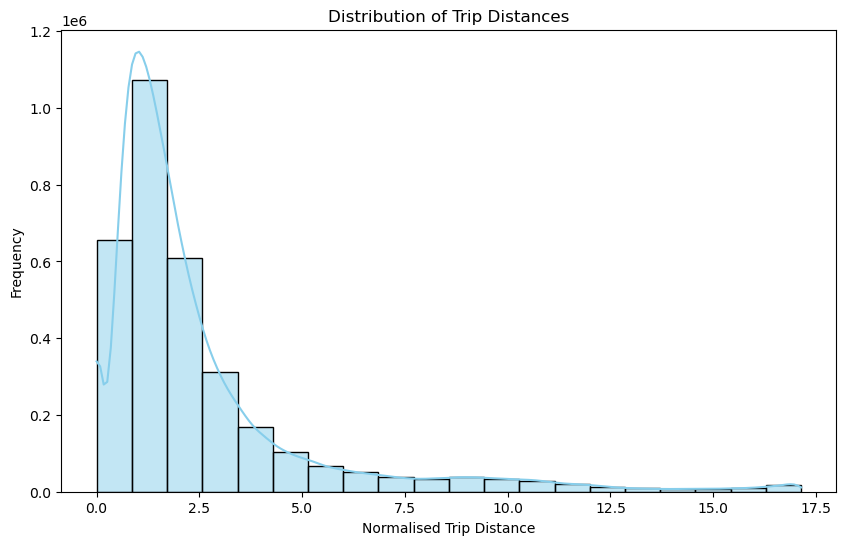

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(trips['trip_distance'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Trip Distances')
plt.xlabel('Normalised Trip Distance')
plt.ylabel('Frequency')
plt.show()

Rides are concentrated towards shorter distance